Sankaran S - 16/07/2025

# **Image Classification with Logistic Regression**

I will be using logistic regression to classify images as "smiling" or "not smiling". This is a binary classification problem (2 classes).

## 1. Setup Environment

In [155]:
# Import necessary libraries
import glob
from PIL import Image
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV
import pickle

glob is a Python module used to retrieve files/pathnames matching a specified pattern (like *.jpg to find all JPG files).

PIL (Python Imaging Library) is used for image processing.

In [20]:
data_path = r"D:\Data Science Training\Bootcamp\DS_with_keerthi\ML\Logistic Regression\Project\data"
non_smile = glob.glob(data_path + r"\non_smile\*jpg")
smile = glob.glob(data_path + r"\smile\*jpg")
test = glob.glob(data_path + r"\test\*jpg")

In [21]:
print(non_smile[:5])
print(smile[:5])
print(test[:5])

['D:\\Data Science Training\\Bootcamp\\DS_with_keerthi\\ML\\Logistic Regression\\Project\\data\\non_smile\\Aaron_Eckhart_0001.jpg', 'D:\\Data Science Training\\Bootcamp\\DS_with_keerthi\\ML\\Logistic Regression\\Project\\data\\non_smile\\Aaron_Patterson_0001.jpg', 'D:\\Data Science Training\\Bootcamp\\DS_with_keerthi\\ML\\Logistic Regression\\Project\\data\\non_smile\\Abdel_Nasser_Assidi_0002.jpg', 'D:\\Data Science Training\\Bootcamp\\DS_with_keerthi\\ML\\Logistic Regression\\Project\\data\\non_smile\\Abdoulaye_Wade_0004.jpg', 'D:\\Data Science Training\\Bootcamp\\DS_with_keerthi\\ML\\Logistic Regression\\Project\\data\\non_smile\\Abdulaziz_Kamilov_0001.jpg']
['D:\\Data Science Training\\Bootcamp\\DS_with_keerthi\\ML\\Logistic Regression\\Project\\data\\smile\\James_Jones_0001.jpg', 'D:\\Data Science Training\\Bootcamp\\DS_with_keerthi\\ML\\Logistic Regression\\Project\\data\\smile\\James_Kelly_0009.jpg', 'D:\\Data Science Training\\Bootcamp\\DS_with_keerthi\\ML\\Logistic Regression\\

In [22]:
print(len(non_smile))
print(len(smile))
print(len(test))

603
600
12030


## 2. Data cleaning

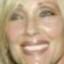

In [39]:
img = Image.open(smile[18])
img

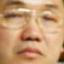

In [40]:
Image.open(non_smile[17])

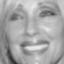

In [46]:
img = img.convert('L')    # Convert the RGB img into Greyscale img
img

In [47]:
pixel_arr = np.array(img)
pixel_arr

array([[203, 199, 192, ..., 195, 197, 195],
       [201, 198, 188, ..., 195, 198, 199],
       [198, 195, 184, ..., 195, 200, 202],
       ...,
       [152, 140, 124, ..., 173, 163, 163],
       [160, 149, 134, ..., 171, 163, 165],
       [167, 157, 142, ..., 166, 163, 165]], shape=(64, 64), dtype=uint8)

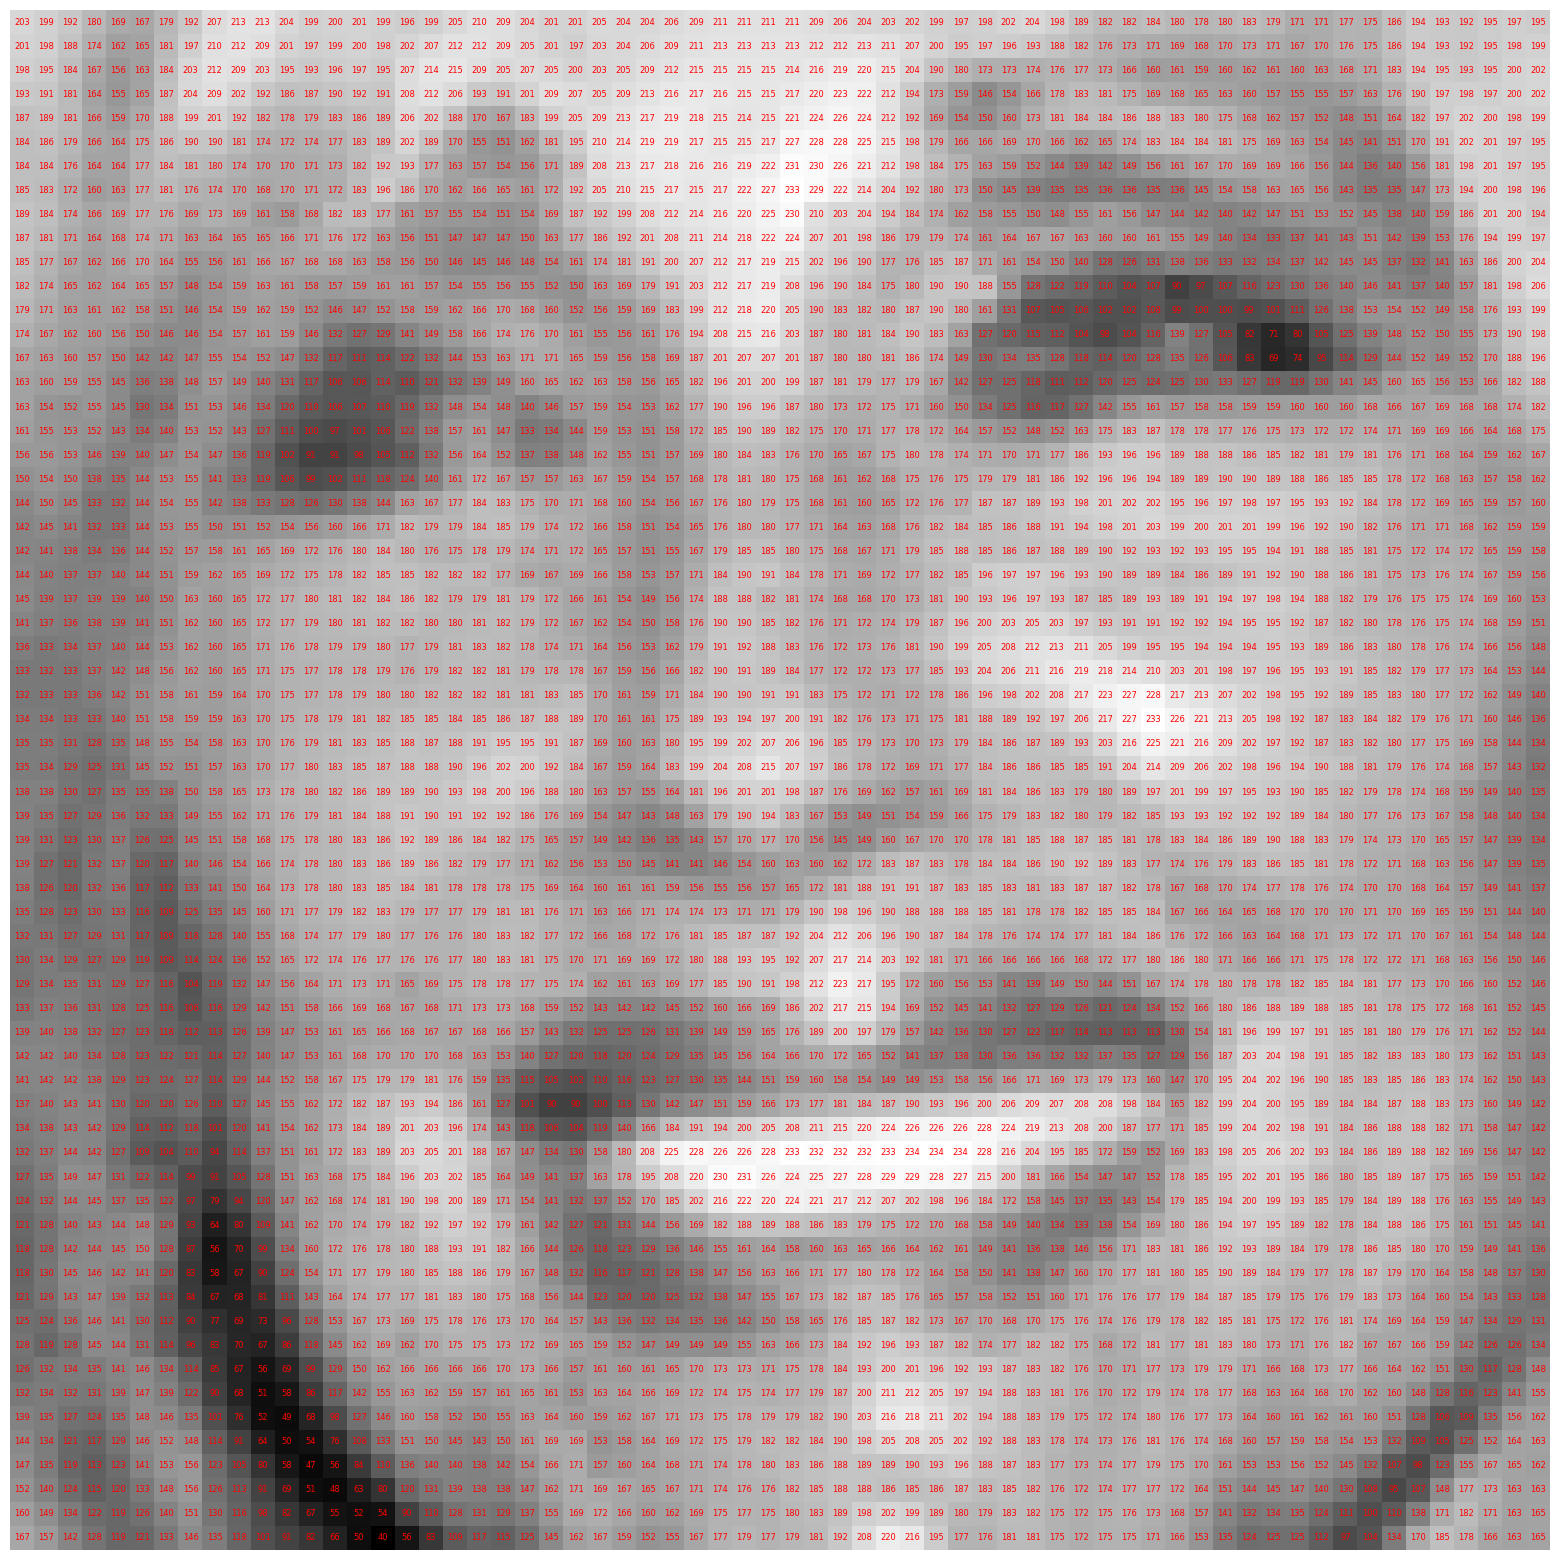

In [ ]:
# Visualizing image pixels with values
plt.figure(figsize = (20, 20))
plt.imshow(pixel_arr, cmap = "gray", interpolation= "nearest")

for i in range(64):
    for j in range(64):
        plt.text(j, i, pixel_arr[i, j], ha = "center", va = "center", fontsize = 6, color = "red")
        
plt.axis("off")
plt.show()

In [75]:
data = []
labels = []

# Label 0: Non-smile
for image in non_smile:
    img = Image.open(image)
    img = img.convert("L")
    img = np.array(img).flatten() # Reshape X: Flatten each 64x64 image into a 1D array for logistic regression.
    data.append(img)
    labels.append(0)

In [76]:
len(data), len(labels)

(603, 603)

In [77]:
# Label 1: Smile
for image in smile:
    img = Image.open(image)
    img = img.convert("L")
    img = np.array(img).flatten() # Reshape X: Flatten each 64x64 image into a 1D array for logistic regression.
    data.append(img)
    labels.append(1)

In [78]:
len(data), len(labels)

(1203, 1203)

In [79]:
type(data)

list

In [80]:
print(data[0])
print(labels[0])

[136 154 164 ...  64  64  64]
0


In [81]:
# Convert to numpy arrays
X = np.array(data)
y = np.array(labels)

print(type(X))
print(type(y))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


## 3. Model development

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 42, shuffle= True)

shuffle=True:

This tells the function to shuffle the data randomly before splitting.

Why?
-- So you don’t end up with all smiles in train and all non-smiles in test.

In [83]:
type(X_train)

numpy.ndarray

In [84]:
X_train[0]

array([ 97, 112, 127, ...,  12,  12,  13], shape=(4096,), dtype=uint8)

In [85]:
X_train.shape

(962, 4096)

In [ ]:
X_test.shape

(241, 4096)

In [ ]:
# Feature scaling
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [88]:
X_train_scaled[0]

array([-0.02540282,  0.19722396,  0.4011609 , ..., -1.43245076,
       -1.41053727, -1.37453322], shape=(4096,))

###  Training the Logistic Regression Model

In [90]:
model = LogisticRegression()

In [91]:
model.fit(X_train_scaled, y_train)

LogisticRegression()

###  Making Predictions

In [ ]:
# Predict labels (0/1) for test images
X_pred = model.predict(X_test_scaled)
X_pred

array([1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1])

In [ ]:
# Predict probabilities (confidence scores) for each class
model.predict_proba(X_test_scaled)

array([[6.95385178e-06, 9.99993046e-01],
       [2.30101395e-01, 7.69898605e-01],
       [9.89954943e-01, 1.00450568e-02],
       [2.96229707e-11, 1.00000000e+00],
       [1.00000000e+00, 6.33333388e-12],
       [9.94252681e-01, 5.74731933e-03],
       [2.75175017e-07, 9.99999725e-01],
       [9.99995294e-01, 4.70611506e-06],
       [4.74672990e-09, 9.99999995e-01],
       [1.93305233e-04, 9.99806695e-01],
       [5.57950681e-03, 9.94420493e-01],
       [3.61843175e-08, 9.99999964e-01],
       [9.99999908e-01, 9.22714799e-08],
       [9.91507734e-01, 8.49226621e-03],
       [9.99999999e-01, 6.57234680e-10],
       [9.99999926e-01, 7.36524497e-08],
       [2.84461969e-02, 9.71553803e-01],
       [9.99922653e-01, 7.73471290e-05],
       [1.95145239e-08, 9.99999980e-01],
       [9.99993893e-01, 6.10697697e-06],
       [4.03573064e-09, 9.99999996e-01],
       [1.33518526e-02, 9.86648147e-01],
       [9.96992255e-01, 3.00774535e-03],
       [3.69498985e-08, 9.99999963e-01],
       [9.996481

###  Evaluating Model Performance

In [ ]:
accuracy = accuracy_score(y_test, X_pred)
print(f'Model Accuracy: {round(accuracy, 4) * 100}' + "%")

# Confusion Matrix (True Negatives, False Positives, False Negatives, True Positives)
print("\nConfusion Matrix: \n", confusion_matrix(y_test, X_pred))

print("\nClassification Report: \n", classification_report(y_test, X_pred))

Model Accuracy: 89.21%

Confusion Matrix: 
 [[114  12]
 [ 14 101]]

Classification Report: 
               precision    recall  f1-score   support

           0       0.89      0.90      0.90       126
           1       0.89      0.88      0.89       115

    accuracy                           0.89       241
   macro avg       0.89      0.89      0.89       241
weighted avg       0.89      0.89      0.89       241



|               | Predicted: 0          | Predicted: 1          |
| ------------- | --------------------- | --------------------- |
| **Actual: 0** | ✅ 114 (True Negative) | ❌ 12 (False Positive) |
| **Actual: 1** | ❌ 14 (False Negative) | ✅ 101 (True Positive) |


114: Correctly predicted non-smile as non-smile ✅

12: Wrongly predicted non-smile as smile ❌

14: Wrongly predicted smile as non-smile ❌

101: Correctly predicted smile as smile ✅

## 4. Hyperparameter tuning

In [127]:
param = {
    'penalty' : ['l1', 'l2', 'elasticnet'],
    'C' : [0.01, 0.1, 1, 10, 100],
    'solver' : ['saga']
}

In [137]:
param = {
    'penalty': ['l1', 'l2', 'elasticnet'],
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['saga'],
    'l1_ratio': [0.1, 0.5, 0.9],  # Required for elasticnet
    'max_iter': [200]  # Increase iterations
}

In [138]:
log_reg = LogisticRegression()

In [139]:
grid_search = GridSearchCV(log_reg, param, n_jobs= -1, cv = 5, scoring = 'accuracy')

In [140]:
grid_search.fit(X_train_scaled, y_train)

c:\Users\sanka\anaconda3\envs\learning\Lib\site-packages\sklearn\linear_model\_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
c:\Users\sanka\anaconda3\envs\learning\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'l1_ratio': [0.1, 0.5, 0.9], 'max_iter': [200],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['saga']},
             scoring='accuracy')

In [142]:
grid_search.best_params_

{'C': 0.01,
 'l1_ratio': 0.1,
 'max_iter': 200,
 'penalty': 'l2',
 'solver': 'saga'}

In [143]:
grid_search.best_score_

np.float64(0.8804188255613127)

**Since hyperparameter tuning resulted in lower accuracy (88%) compared to the default model (89%), I decided to proceed with the default settings.**

**Test with new image**

-- gray scale

-- numpy array

-- flatten

-- scaling

In [144]:
sample_test_img = glob.glob(data_path + r"\sample_test\*jpg")
sample_test_img

['D:\\Data Science Training\\Bootcamp\\DS_with_keerthi\\ML\\Logistic Regression\\Project\\data\\sample_test\\Aaron_Peirsol_0003.jpg',
 'D:\\Data Science Training\\Bootcamp\\DS_with_keerthi\\ML\\Logistic Regression\\Project\\data\\sample_test\\Aaron_Peirsol_0004.jpg',
 'D:\\Data Science Training\\Bootcamp\\DS_with_keerthi\\ML\\Logistic Regression\\Project\\data\\sample_test\\Aaron_Pena_0001.jpg',
 'D:\\Data Science Training\\Bootcamp\\DS_with_keerthi\\ML\\Logistic Regression\\Project\\data\\sample_test\\Aaron_Sorkin_0001.jpg',
 'D:\\Data Science Training\\Bootcamp\\DS_with_keerthi\\ML\\Logistic Regression\\Project\\data\\sample_test\\Abdullah_al-Attiyah_0001.jpg']

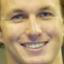

In [149]:
img = Image.open(sample_test_img[0])
display(img)

Image: D:\Data Science Training\Bootcamp\DS_with_keerthi\ML\Logistic Regression\Project\data\sample_test\Aaron_Peirsol_0003.jpg


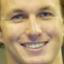


 Converted into RGB to grayscale: 



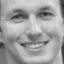


 image_array: 
 [142 164 176 ... 191 170  89]

 Scaled_array: 
 [[ 0.85930189  1.24300851  1.39804647 ...  1.82764223  1.4399051
  -0.02849956]]

Predicted = Smile [1]

Probability - Non-smile (0): 2.98%
Probability - Smile (1): 97.02%

Image: D:\Data Science Training\Bootcamp\DS_with_keerthi\ML\Logistic Regression\Project\data\sample_test\Aaron_Peirsol_0004.jpg


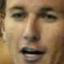


 Converted into RGB to grayscale: 



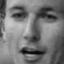


 image_array: 
 [59 63 45 ... 61 66 71]

 Scaled_array: 
 [[-0.77248679 -0.78822686 -1.26709659 ... -0.54002307 -0.43633545
  -0.34729701]]

Predicted = Non-smile [0]

Probability - Non-smile (0): 100.0%
Probability - Smile (1): 0.0%

Image: D:\Data Science Training\Bootcamp\DS_with_keerthi\ML\Logistic Regression\Project\data\sample_test\Aaron_Pena_0001.jpg


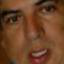


 Converted into RGB to grayscale: 



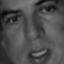


 image_array: 
 [51 58 67 ... 93 94 89]

 Scaled_array: 
 [[-0.92976763 -0.88878307 -0.81951531 ...  0.04278685  0.06880624
  -0.02849956]]

Predicted = Non-smile [0]

Probability - Non-smile (0): 99.69%
Probability - Smile (1): 0.31%

Image: D:\Data Science Training\Bootcamp\DS_with_keerthi\ML\Logistic Regression\Project\data\sample_test\Aaron_Sorkin_0001.jpg


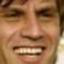


 Converted into RGB to grayscale: 



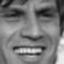


 image_array: 
 [ 19  32  56 ... 227 234 234]

 Scaled_array: 
 [[-1.55889098 -1.41167534 -1.04330595 ...  2.4833034   2.59451467
   2.53959097]]

Predicted = Smile [1]

Probability - Non-smile (0): 0.0%
Probability - Smile (1): 100.0%

Image: D:\Data Science Training\Bootcamp\DS_with_keerthi\ML\Logistic Regression\Project\data\sample_test\Abdullah_al-Attiyah_0001.jpg


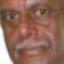


 Converted into RGB to grayscale: 



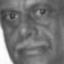


 image_array: 
 [ 90  93  96 ...  94  98 101]

 Scaled_array: 
 [[-0.16302355 -0.18488962 -0.22952181 ...  0.06099966  0.14096934
   0.18403207]]

Predicted = Smile [1]

Probability - Non-smile (0): 3.77%
Probability - Smile (1): 96.23%



In [177]:
# Processing and Predicting
for i in sample_test_img:
    img = Image.open(i)
    print(f"Image: {i}")
    display(img)
    
    img = img.convert('L')
    print("\n Converted into RGB to grayscale: \n")
    display(img)
    
    img_arr = np.array(img).flatten()
    print("\n image_array: \n", img_arr)
    
    scaled_arr = scaler.transform(img_arr.reshape(1, -1))
    print("\n Scaled_array: \n", scaled_arr)
    
    value = model.predict(scaled_arr)
    if value == [0]:
        print("\nPredicted = Non-smile", value)
    else:
        print("\nPredicted = Smile", value)
        
    value_probability = model.predict_proba(scaled_arr)
    print(f"\nProbability - Non-smile (0): {round(value_probability[0][0] * 100, 2)}%")
    print(f"Probability - Smile (1): {round(value_probability[0][1] * 100, 2)}%\n")

In [170]:
value_probability[0]

array([0.03766114, 0.96233886])

## Save the model

In [156]:
pickle.dump(model, open("img_class_lgr_model.pkl", "wb"))
pickle.dump(scaler, open("scaler.pkl", "wb"))